# COSC 3337: Data Science I
# Homework 1 (Regression)

# Dr. Rizk

### [100 points]


_About The Data_

The data we'll be using comes from kaggle, and contains the following car attributes:

    car_ID
    symboling
    CarName
    fueltype
    aspiration
    doornumber
    carbody
    drivewheel
    enginelocation
    wheelbase
    carlength
    carwidth
    carheight
    curbweight
    enginetype
    cylindernumber
    enginesize
    fuelsystem
    boreratio
    stroke
    compressionratio
    horsepower
    peakrpm
    citympg
    highwaympg
    price

## Problem Statement

You are required to model the price of cars with the available independent variables. It will be used by your management team to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In general, your company would like for you to answer the following:

    Which variables are significant in predicting the price of a car
    How well those variables describe the price of a car



## Part 1: Reading and Understanding the Data

### [8 points]

Begin by importing some necessary libraries that you'll be using to explore the data.

In [882]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [883]:
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')
sns.set_palette('Accent')

1.1 Import the data using pandas and save into a variable named cars_df. Then display the first 5 rows.

[3 Points]

In [884]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
car_df = pd.read_csv('car_data.csv')
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


1.2 Print some basic statistics of your data.

[3 Points]

In [885]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


1.3 Print some general information about your data using pandas.

[2 Points]

In [886]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

By looking at our previous output, are there any missing values in this dataset? How do we know?

### TYPE YOUR ANSWER HERE

## Part 2: Data Cleaning and Preparation

### [7 Points]

2.1 Instead of using car names, let's extract company names to see how the companies are distributed. Use the CarName column to create a new column in cars_df called 'car_company' that tells us which company the car belongs to. Once you've accomplished this, display all of the unique company names in our dataset.

Hint: Every carName value has the car company name placed in front of it, so you can parse it out. Also lowercase every company name to ensure that we don't double count something like bmw with BMW.

[3 Points]

In [887]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
#car_df['CarName'].items()
car_list = []
for index, value in car_df['CarName'].items():
    car_list.insert(index, value.split()[0].lower())

car_df['car_company'] = car_list
car_df['car_company'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

2.2 Notice how there are some typos in the data. 'toyouta' should be 'toyota', 'porcshce' should be 'porsche', 'maxda' should be 'mazda', 'vokswagen' should be 'volkswagen', and 'vw' should be 'volkswagen'. Use Pandas to make these name corrections and display the unique company names again.

[4 Points]

In [888]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
for index, value in car_df['car_company'].items():
    new_value = ''
    match value:
        case 'maxda':
            new_value = 'mazda'
        case 'porcshce':
            new_value = 'porsche'
        case 'toyouta':
            new_value = 'toyota'
        case 'vokswagen':
            new_value = 'volkswagen'
        case 'vw':
            new_value = 'volkswagen'
        case _:
            new_value = value
    car_df.at[index, 'car_company'] = new_value

car_df['car_company'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Part 3: Visualising Categorical Data

### [50 points]


    CompanyName
    Symboling
    fueltype
    enginetype
    carbody
    doornumber
    enginelocation
    fuelsystem
    cylindernumber
    aspiration
    drivewheel

3.1 Create the following plots

    1. A plot of the unique company names on the x-axis, and the value counts on the y-axis.
    2. A plot of the unique car bodys on the x-axis and value counts on the y-axis.

[4 Points]

C:\Users\maixa\AppData\Local\Temp\ipykernel_29556\3980215631.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


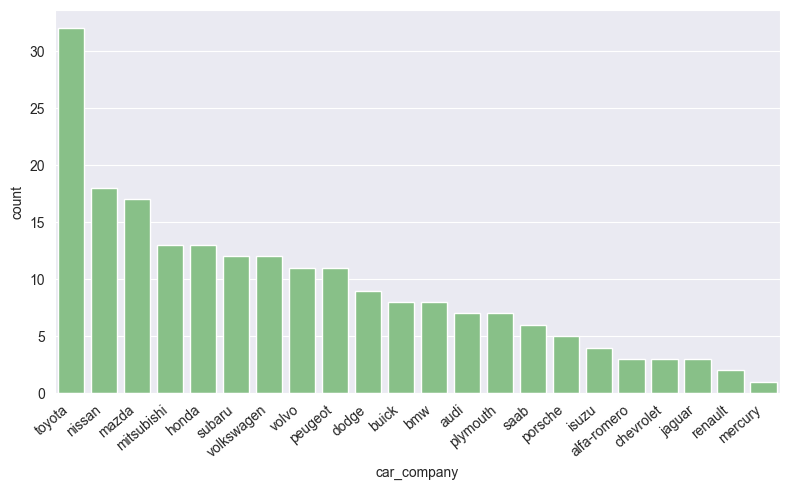

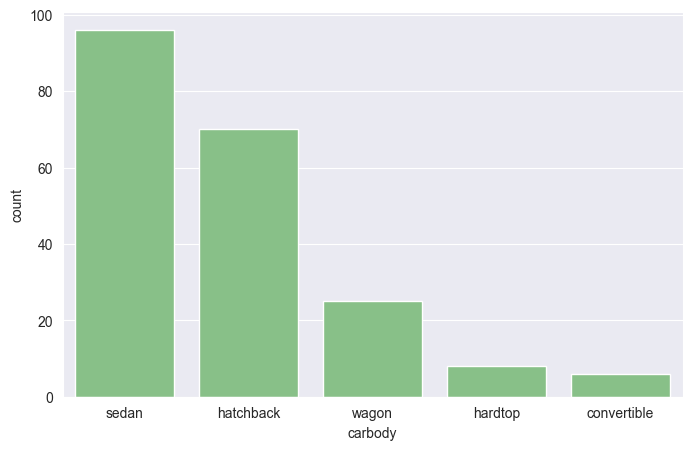

We can conclude that Toyota and sedan are the majority of car brands and type, while mercury and convertible are the least owned


In [889]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
# Car Company
ax = sns.countplot(x='car_company', data=car_df, order = car_df['car_company'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# CarBody
sns.color_palette(palette='Accent')
sns.countplot(x=car_df['carbody'], order = car_df['carbody'].value_counts().index)
plt.show()

##
print('We can conclude that Toyota and sedan are the majority of car brands and type, while mercury and convertible are the least owned')

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

3.2 Create the following plots

    1. A plot of the unique company names on the x-axis, and that companies average price on the y-axis.
    2. A plot of the unique car bodys on the x-axis and that car body's average price on the y-axis.

[4 Points]

In [890]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###


After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

3.3 Create the following plots

    1. A plot of the unique symboling values on the x-axis, and the value counts on the y-axis.
    2. A box plot of the unique symboling values on the x-axis and price on the y-axis.

[4 Points]

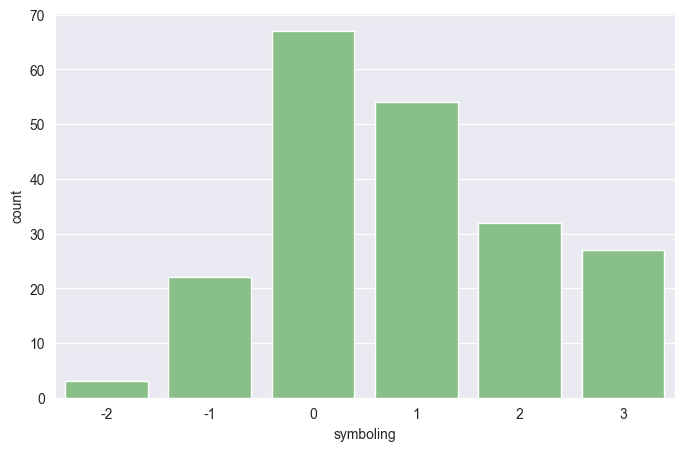

Most cars have a symboling of 0 and 1, while -2 is the least


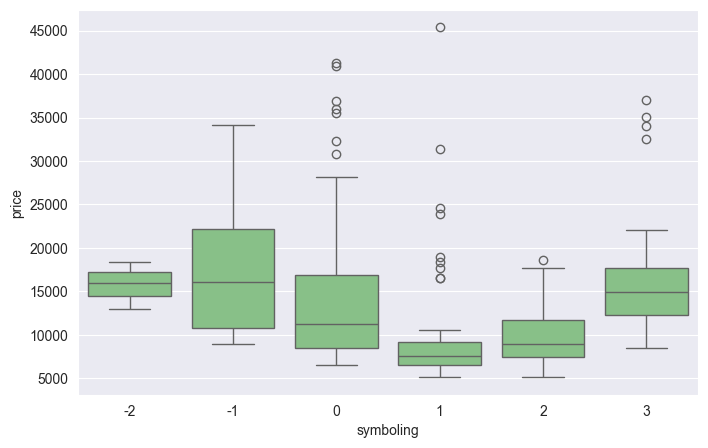

Symboling of 0 and 1 have a lot of outliers


In [891]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
# Car Company
sns.countplot(x=car_df['symboling'], data=car_df)
plt.show()
print('Most cars have a symboling of 0 and 1, while -2 is the least')

# CarBody
sns.boxplot(x='symboling', y='price', data=car_df)
plt.show()

##
print('Symboling of 0 and 1 have a lot of outliers')

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

3.4 Create the following plots

    1. A plot of enginetype on the x-axis, and the value counts on the y-axis.
    2. A box plot of enginetype on the x-axis and price on the y-axis.

[4 Points]

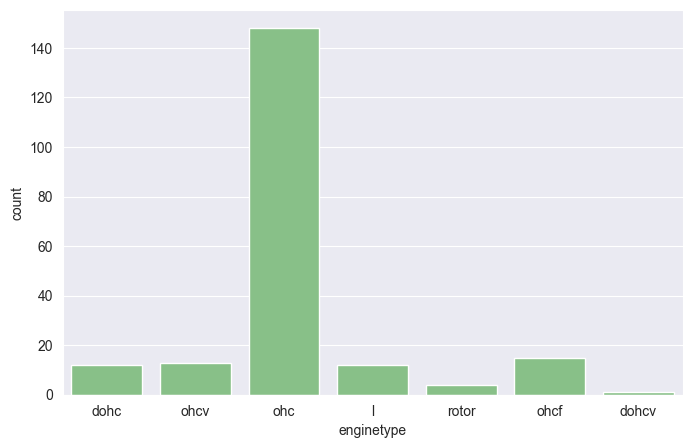

Ohc takes the majority


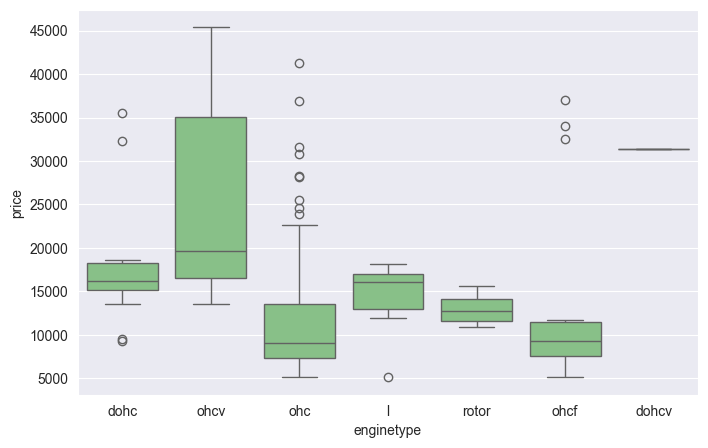

ohcv has a broad price range, most are from 16000 to 35000. ohc also contains a lot of outliers


In [892]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
# Car Company
sns.countplot(x='enginetype', data=car_df)
plt.show()
print('Ohc takes the majority')

# CarBody
sns.boxplot(x='enginetype', y='price', data=car_df)
plt.show()

##
print('ohcv has a broad price range, most are from 16000 to 35000. ohc also contains a lot of outliers')

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

3.5 Create the following plots

    1. A plot of cylindernumber on the x-axis, and the value counts on the y-axis.
    2. A box plot of cylindernumber on the x-axis and price on the y-axis.

[4 Points]

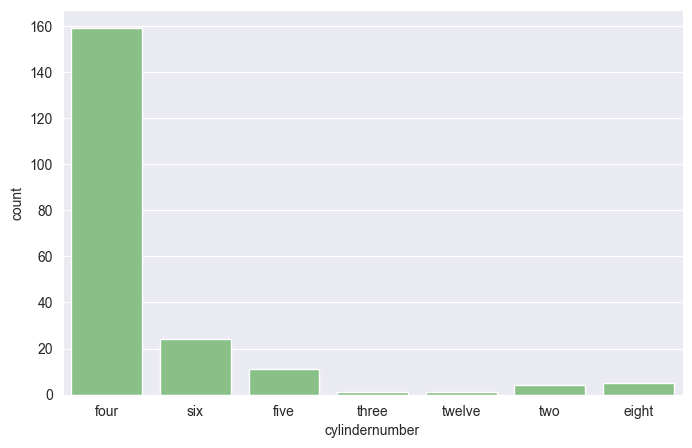

Most cars have 4 cylinders. Very few has three or twelve cylinders


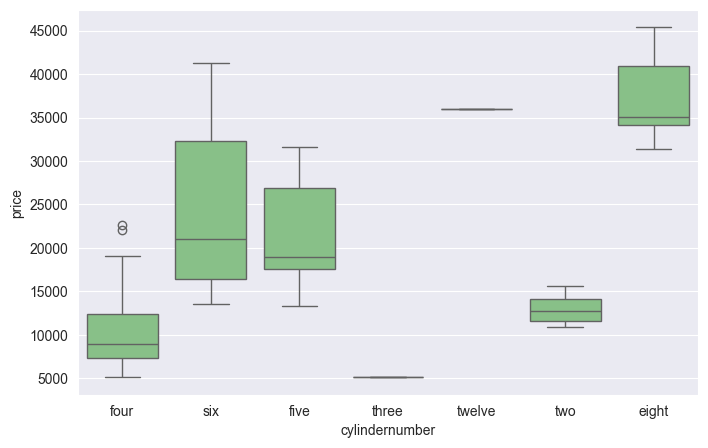

The price range of different cylinder number varies significantly


In [893]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
# Car Company
sns.countplot(x='cylindernumber', data=car_df)
plt.show()
print('Most cars have 4 cylinders. Very few has three or twelve cylinders')

# CarBody
sns.boxplot(x='cylindernumber', y='price', data=car_df)
plt.show()

##
print('The price range of different cylinder number varies significantly')

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

3.6 Create the following plots

    1. A plot of fuelsystem on the x-axis, and the value counts on the y-axis.
    2. A box plot of fuelsystem on the x-axis and price on the y-axis.

[5 Points]

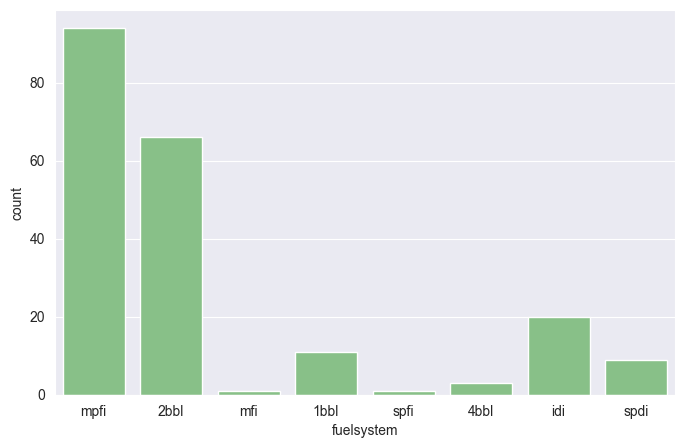

Most cars have a symboling of 0 and 1, while -2 is the least


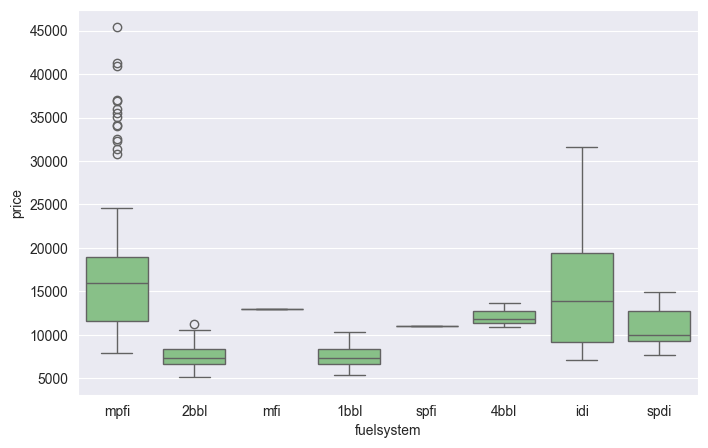

Symboling of 0 and 1 have a lot of outliers


In [894]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
# Car Company
sns.countplot(x='fuelsystem', data=car_df)
plt.show()
print('Most cars have a symboling of 0 and 1, while -2 is the least')

# CarBody
sns.boxplot(x='fuelsystem', y='price', data=car_df)
plt.show()

##
print('Symboling of 0 and 1 have a lot of outliers')

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

3.7 Create the following plots

    1. A plot of drivewheel on the x-axis, and the value counts on the y-axis.
    2. A box plot of drivewheel on the x-axis and price on the y-axis.

[5 Points]

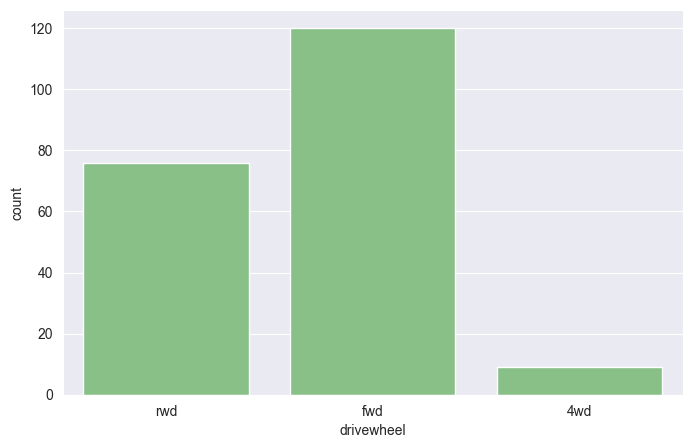

Most cars have fwd, secondly is rwd with 4wd as the least


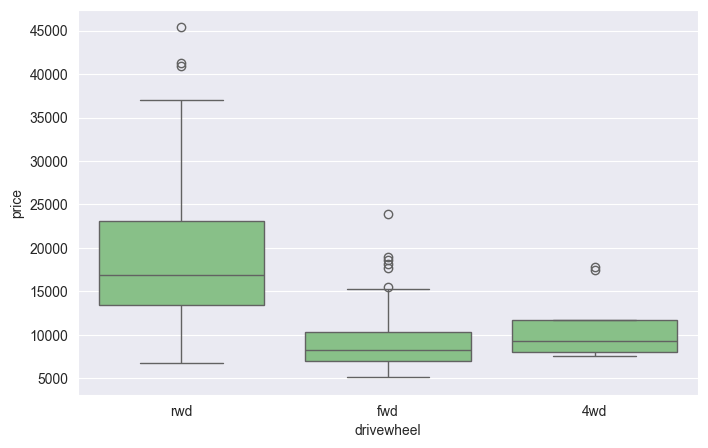

rwd price range is more significant compared to the rest


In [895]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
# Car Company
sns.countplot(x='drivewheel', data=car_df)
plt.show()
print('Most cars have fwd, secondly is rwd with 4wd as the least')

# CarBody
sns.boxplot(x='drivewheel', y='price', data=car_df)
plt.show()

##
print('rwd price range is more significant compared to the rest')

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

3.8 Create the following plots

    1. A plot of enginelocation on the x-axis, and the value counts on the y-axis.
    2. A box plot of enginelocation on the x-axis and price on the y-axis.

[5 Points]

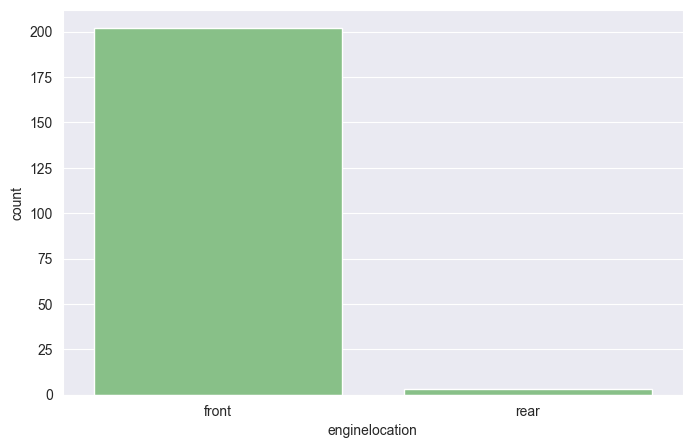

Front door are in a significant amount of cars


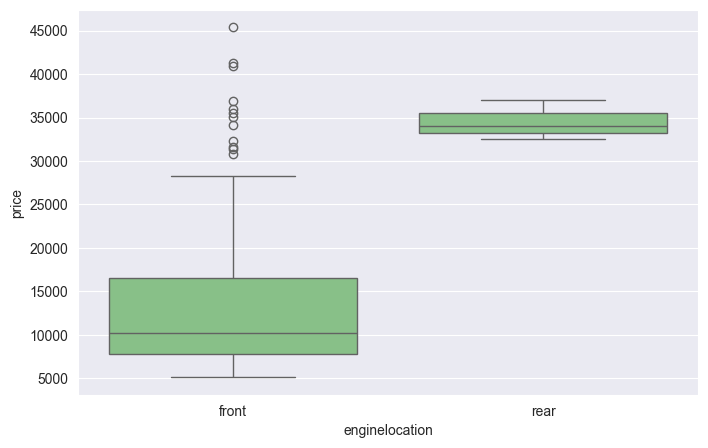

front door has outliers, while rear door have none with in the price range of 35,000


In [896]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
# Car Company
sns.countplot(x='enginelocation', data=car_df)
plt.show()
print('Front door are in a significant amount of cars')

# CarBody
sns.boxplot(x='enginelocation', y='price', data=car_df)
plt.show()

##
print('front door has outliers, while rear door have none with in the price range of 35,000')

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

3.9 Create the following plots

    1. A plot of fueltype on the x-axis, and the value counts on the y-axis.
    2. A box plot of fueltype on the x-axis and price on the y-axis.

[5 Points]

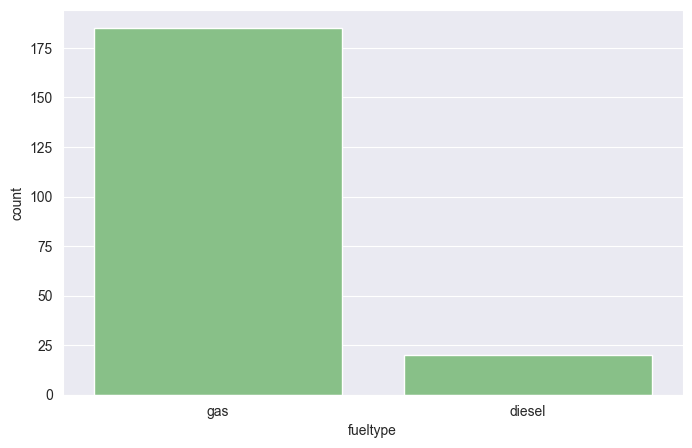

The majority of car use gas


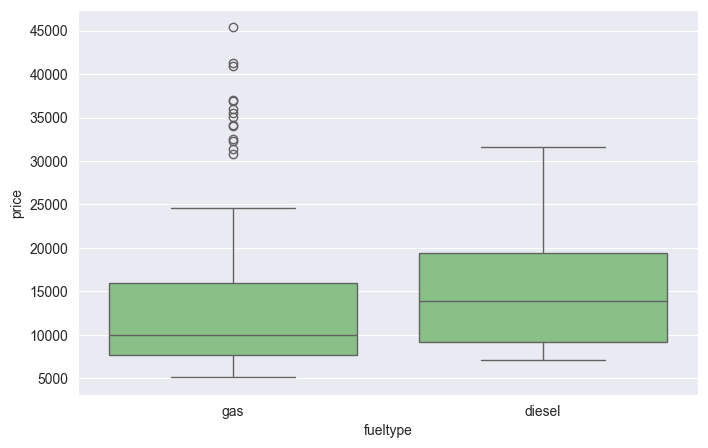

Gas has a lot of outliers in price


In [897]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
# Car Company
sns.countplot(x='fueltype', data=car_df)
plt.show()
print('The majority of car use gas')

# CarBody
sns.boxplot(x='fueltype', y='price', data=car_df)
plt.show()

##
print('Gas has a lot of outliers in price')

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

3.10 Create the following plots

    1. A plot of doornumber on the x-axis, and the value counts on the y-axis.
    2. A box plot of doornumber on the x-axis and price on the y-axis.

[5 Points]

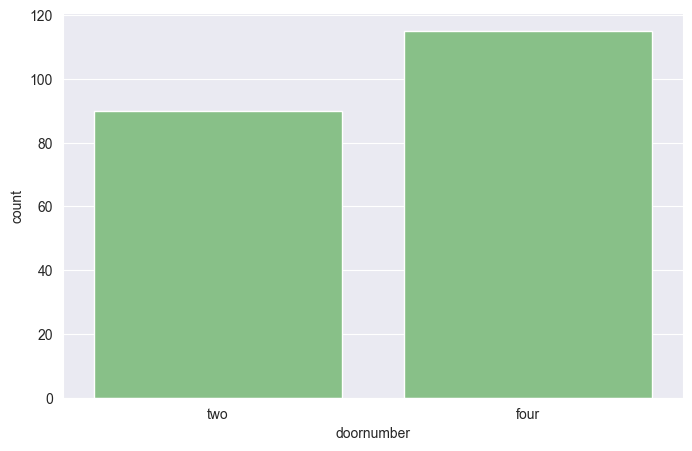

Door number are relative to each other with four door having the majority


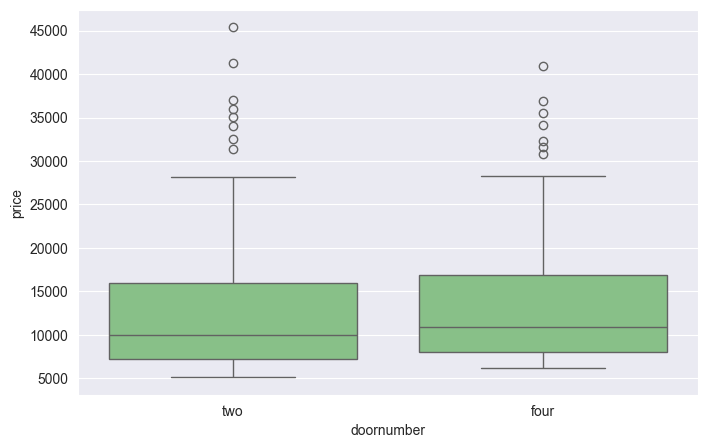

Both door numbers and in similar price ranges with some amount of outliers


In [898]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
# Car Company
sns.countplot(x='doornumber', data=car_df)
plt.show()
print('Door number are relative to each other with four door having the majority')

# CarBody
sns.boxplot(x='doornumber', y='price', data=car_df)
plt.show()

##
print('Both door numbers and in similar price ranges with some amount of outliers')

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

3.11 Create the following plots

    1. A plot of aspiration on the x-axis, and the value counts on the y-axis.
    2. A box plot of aspiration on the x-axis and price on the y-axis.

[5 Points]

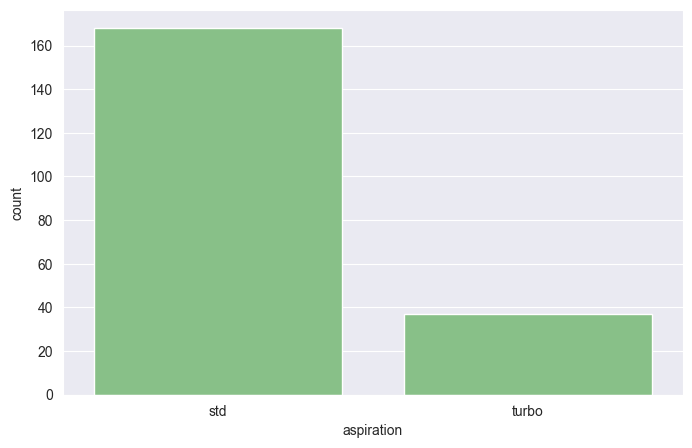

Most cars have std as the aspiration


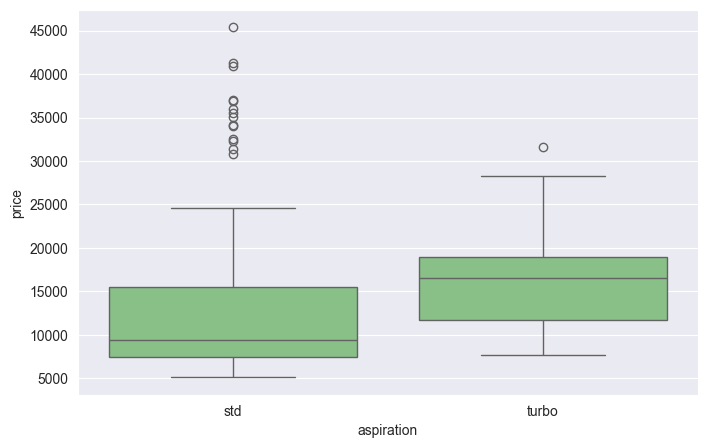

Std aspiration contains a lot of outliers in price


In [899]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
# Car Company
sns.countplot(x='aspiration', data=car_df)
plt.show()
print('Most cars have std as the aspiration')

# CarBody
sns.boxplot(x='aspiration', y='price', data=car_df)
plt.show()

##
print('Std aspiration contains a lot of outliers in price')

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

## Part 4: Visualizing Numerical Data

### [15 Points]

    price
    carlength
    carwidth
    carheight
    curbweight
    enginesize
    boreratio
    stroke
    compressionratio
    horsepower
    peakrpm
    wheelbase
    citympg
    highwaympg

4.1 Create the following plots

    1. A plot showing the price distribution
    2. A box plot of price

[3 Points]

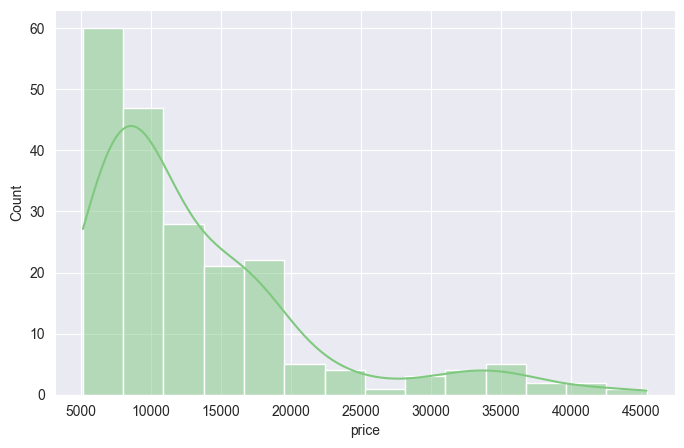

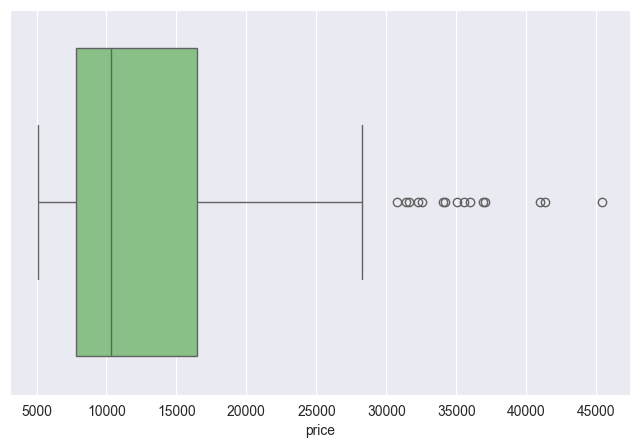

Price mostly in the range from 7500 to 16,000 with a lot of outliers up to the range of 48,000


In [900]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
sns.histplot(x='price', data=car_df, kde=True)
plt.show()

sns.boxplot(x='price', data=car_df)
plt.show()

print('Price mostly in the range from 7500 to 16,000 with a lot of outliers up to the range of 48,000')

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

Let's try and get an idea of how the car attributes related to a car's size are related to price.

4.2 Create the following plots

    1. A scatter plot of carlength vs price.
    2. A scatter plot of carwidth vs price.
    3. A scatter plot of carheight vs price.
    4. A scatter plot of carweight vs price.

[3 Points]

car length, car width and curb weight have a moderate positive correlation with the price while car height has little correlation


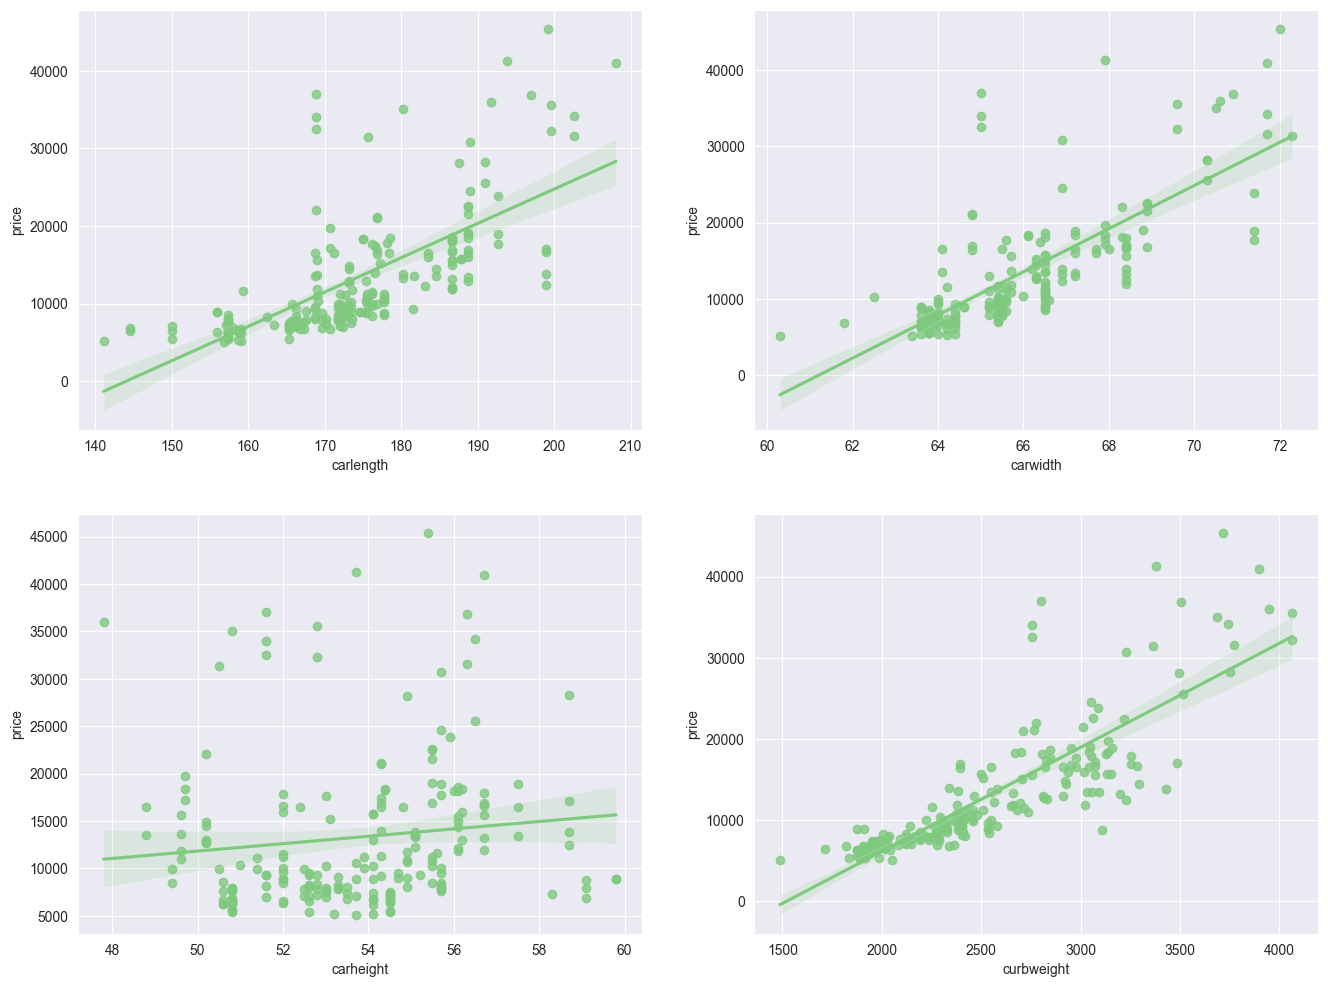

In [901]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.regplot(ax=axes[0][0], x='carlength', y='price', data=car_df)

sns.regplot(ax=axes[0][1], x='carwidth', y='price', data=car_df)

sns.regplot(ax=axes[1][0], x='carheight', y='price', data=car_df)

sns.regplot(ax=axes[1][1], x='curbweight', y='price', data=car_df)

print('car length, car width and curb weight have a moderate positive correlation with the price while car height has little correlation')


After creating the 4 plots above, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

4.3 Create scatter plots of the remaining numerical variables to see their relationship with price.

Create the following plots

    1. A scatter plot of enginesize vs price.
    2. A scatter plot of boreratio vs price.
    3. A scatter plot of stroke vs price.
    4. A scatter plot of compressionratio vs price.
    5. A scatter plot of horsepower vs price.
    6. A scatter plot of peakrpm vs price.
    7. A scatter plot of wheelbase vs price.
    8. A scatter plot of citympg vs price.
    9. A scatter plot of highwaympg vs price.

[3 Points]

engine size, horse power have a strong positive correlation with the price whereas city and highway mpg have a moderate negative correlation


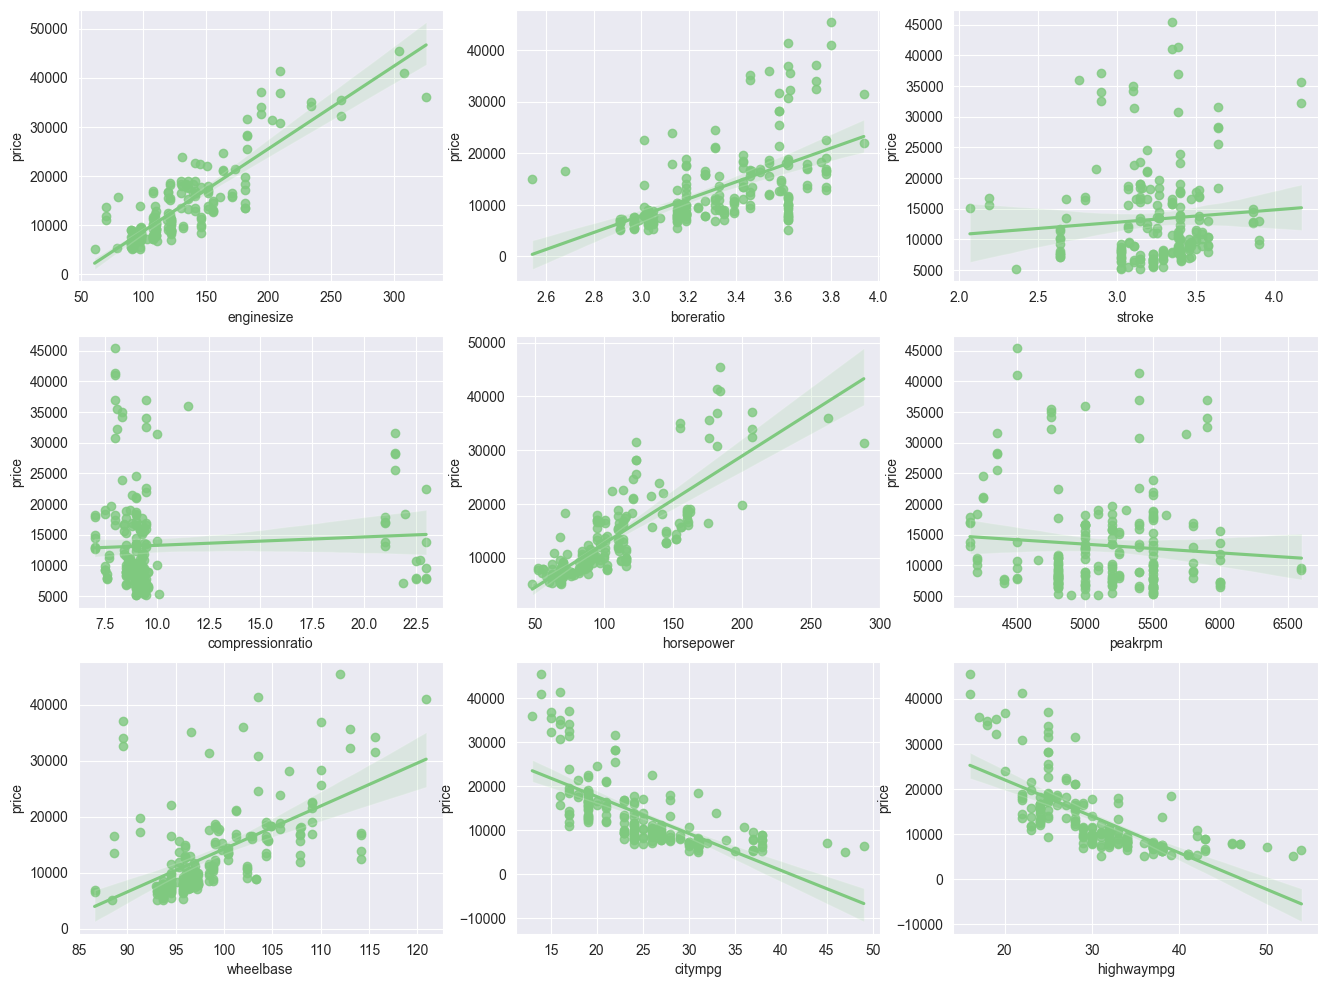

In [902]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
#1st ROW
sns.regplot(ax=axes[0][0], x='enginesize', y='price', data=car_df)

sns.regplot(ax=axes[0][1], x='boreratio', y='price', data=car_df)

sns.regplot(ax=axes[0][2], x='stroke', y='price', data=car_df)

#2nd Row
sns.regplot(ax=axes[1][0], x='compressionratio', y='price', data=car_df)

sns.regplot(ax=axes[1][1], x='horsepower', y='price', data=car_df)

sns.regplot(ax=axes[1][2], x='peakrpm', y='price', data=car_df)

#3rd Row
sns.regplot(ax=axes[2][0], x='wheelbase', y='price', data=car_df)

sns.regplot(ax=axes[2][1], x='citympg', y='price', data=car_df)

sns.regplot(ax=axes[2][2], x='highwaympg', y='price', data=car_df)

print('engine size, horse power have a strong positive correlation with the price whereas city and highway mpg have a moderate negative correlation')

After creating the plots above, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

4.4 Create a heatmap or correlation matrix to inspect the correlations in our dataset.

[3 Points]

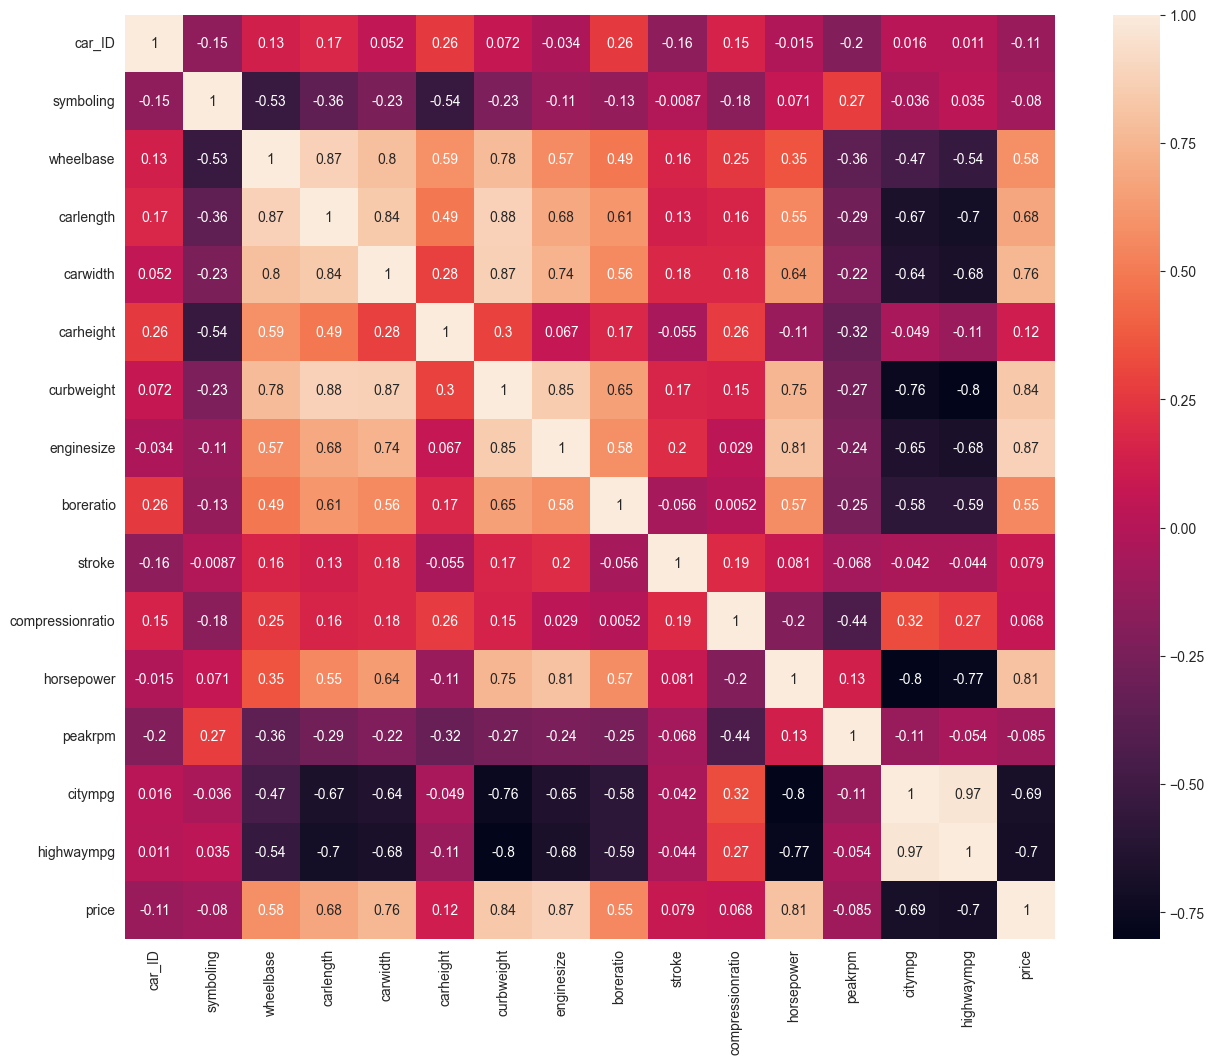

We can conclude that citympg and highwaympg are tightly correlated, thus can be combined


In [903]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
#car_df.corr(numeric_only=True)
plt.figure(figsize=(15,12))
sns.heatmap(data=car_df.corr(numeric_only=True), annot=True)
plt.show()
print('We can conclude that citympg and highwaympg are tightly correlated, thus can be combined')

After creating the plot above, what can you conclude? Are there any features you can combine to form a new one? If so, try it out and see how it affects your final results in the end.

### TYPE YOUR ANSWER HERE

4.5 For example, citympg and highwaympg can be combined into a single feature. Create a new column called 'fuel_economy' that's a combination of the 2.


In [904]:
### WRITE YOUR CODE HERE ###
car_df['fuel_economy']  = (car_df['citympg'] + car_df['highwaympg']) / 2

After visual analysis, which variables do you believe to be significant when predicting price, and why?

[3 Points]

### TYPE YOUR ANSWER HERE
Engine size, curb weight and horse power are very correlated with the price, having 0.87, 0.84 and 0.81 correlation coefficient respectively. 
They have a significant impact to predict price.

## Part 5: Data Pre-Processing

### [5 Points]

Perform the following

    1. Convert your categorical variables into dummy variables
    2. Scale the data using a scaler of your choice
    3. Split your data into a training and testing set, with test size of 0.30



In [905]:
### WRITE YOUR CODE HERE ###

cat_columns = ['fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel','enginelocation', 'enginetype','cylindernumber','fuelsystem']
num_columns = ['wheelbase',	'carlength', 'carwidth', 'carheight','curbweight']

car_df = pd.get_dummies(car_df, columns=cat_columns, drop_first=True)
car_df.drop(labels=['CarName','car_company', 'car_ID'], axis=1, inplace=True)


# Scale data
scaler = StandardScaler()
scaled = scaler.fit_transform(car_df)
car_df = pd.DataFrame(scaled, columns=car_df.columns)


# Train model
X = car_df.drop('price', axis=1) 
y = car_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


## Part 6: Model Creation and Evaluation

### [15 Points]

Perform the following using sklearn

    1. Create a linear regression model, and train (fit) it on the training data.
    2. Run the test data through your model to obtain predictions. Save these predictions into a variable called 'predictions'.
    4. Create a scatter plot of the true price labels vs the predicted price value of your model.
    5. Create a histogram of the residuals
    6. Print the $R^2$ of your model

_Note: You don't need to obtain the same results as us. If you made any changes earlier and obtain better results, then even better. Just make sure you're not scoring significantly lower than our obtained values._

[8 Points]

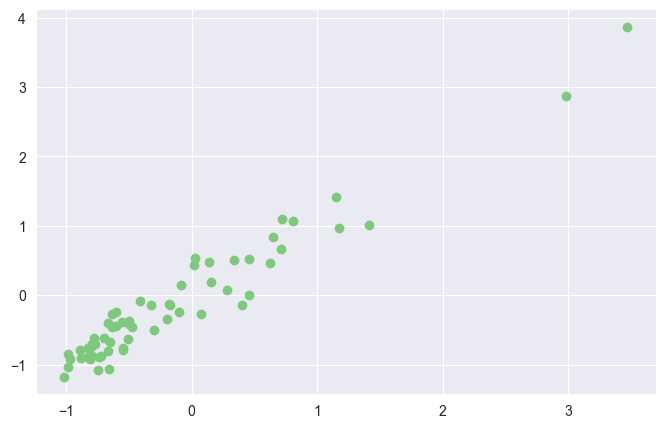

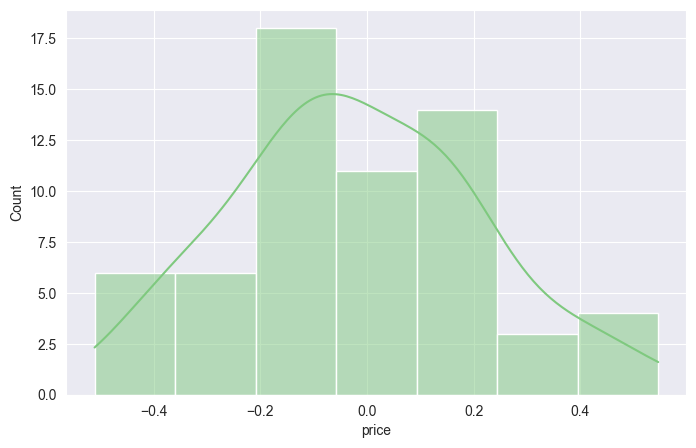

R2 Score:  0.9290671595966931


In [906]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.show()

residuals = y_test - predictions
sns.histplot(residuals, kde=True)
plt.show()


from sklearn.metrics import r2_score
print('R2 Score: ', r2_score(y_test, predictions))

#print('R squared: ', lm.score(X_test, y_test))

Lastly, create a dataframe of your model's coefficents. For example, we obtained the coefficients below.

[7 Points]

In [907]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
coeffdf = pd.DataFrame(lm.coef_ ,X.columns,columns=['Coefficient'])
pd.set_option('display.max_rows', None)
print(coeffdf)

                        Coefficient
symboling             -1.453182e-03
wheelbase              4.368020e-02
carlength             -1.209517e-01
carwidth               1.755599e-01
carheight              3.026152e-02
curbweight             3.065153e-01
enginesize             6.394196e-01
boreratio             -6.393875e-02
stroke                -1.611640e-01
compressionratio      -3.808398e-01
horsepower             9.102670e-02
peakrpm                1.485358e-01
citympg               -1.197684e-01
highwaympg             1.455944e-01
fuel_economy           1.643297e-02
fueltype_gas          -2.197459e-01
aspiration_turbo       7.569254e-02
doornumber_two         2.485568e-02
carbody_hardtop       -6.409062e-02
carbody_hatchback     -1.385479e-01
carbody_sedan         -7.943601e-02
carbody_wagon         -1.074094e-01
drivewheel_fwd         2.339636e-02
drivewheel_rwd         4.907592e-02
enginelocation_rear    1.089384e-01
enginetype_dohcv      -6.843670e-02
enginetype_l          -1.663

What do __your__ coefficients mean? Write a conclusion answering the problem statement we listed earlier, and what you've learned from the model.

### TYPE YOUR CONCLUSION HERE
What these coefficients mean:

- Holding all other features fixed, a 1 unit increase in symboling is associated with a price increase of 147.92.
- Holding all other features fixed, a 1 unit increase in wheelbase is associated with a price increase of 737.36.
- Holding all other features fixed, a 1 unit increase in carlength is associated with a price decrease of 20.37.
...

The model highlights that significant predictors of car price include curb weight, engine size, and horsepower, which are all positively correlated with price. Features like fuel efficiency (via fuel_economy) and cylinder count also play important roles but in varying directions.
